In [288]:
import pandas as pd
from states import states_names, state_codes,get_state_code

In [289]:
# file paths 
file_path_race_demographics = 'us race demographcs 2017.csv'
file_path_incarcernation = '2013-2016_incarceration_usa.csv'
file_path_usa_spending = '2004-2017_usa_spending.csv'

In [290]:
# load the data 
race_demographics_2017 = pd.read_csv(file_path_race_demographics, skipfooter=1)
race_demographics_2017.head()

C:\Users\moshi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,state,hispanic,white,black,asian,indigneous
0,Mississippi,2.90%,56.60%,37.90%,0.90%,0.40%
1,Louisiana,5.20%,58.50%,32.10%,1.80%,0.50%
2,Georgia,9.60%,52.60%,31.10%,3.90%,0.20%
3,Maryland,10.10%,50.70%,29.40%,6.40%,0.20%
4,South Carolina,5.70%,63.60%,26.80%,1.50%,0.20%


In [291]:
incarceration_usa = pd.read_csv(file_path_incarcernation)
incarceration_usa = incarceration_usa[incarceration_usa['region'] != 'District of Columbia']
incarceration_usa = incarceration_usa[incarceration_usa['region'] != 'District of Columbia/g']
incarceration_usa_na = incarceration_usa[incarceration_usa['status_code'].isna()]

def replace_broke(name):
    if name == 'Oklahoma/g':
        return 'Oklahoma'
    elif name == 'Georgia/h':
        return 'Georgia'
    elif name == 'Idaho/i':
        return 'Idaho'
    else:
        return name
    
incarceration_usa['region'] = incarceration_usa['region'].apply(replace_broke)
incarceration_usa['status_code'] = incarceration_usa.apply(get_state_code, axis=1)
incarceration_usa = incarceration_usa[incarceration_usa['status_code'].notna()]
incarceration_usa = incarceration_usa[['region','total_correctional_pop', 'year']]
incarceration_usa

,region,total_correctional_pop,year
0,Alabama,115600,2013
1,Alaska,14600,2013
2,Arizona,132300,2013
3,Arkansas,69900,2013
4,California,600400,2013
...,...,...,...
198,Virginia,120000,2016
199,Washington,127000,2016
200,West Virginia,20100,2016
201,Wisconsin,100500,2016


In [292]:
incarceration_usa_na

,Unnamed: 0,region,total_correctional_pop,csrp_100k_18,csrp_100k_all,parole,comsrp_100k_18,comsrp_100k_all,local_jail_prison,irp_100k_18,irp_100k_all,year,status_code
36,39,Oklahoma/g,67700,2320,0,37900,1300,0,0,0,0,2013,NaN
61,13,Georgia/h,579600,7580,491800,91000,1190,0,0,0,0,2014,NaN
63,15,Idaho/i,48600,4010,37700,11000,910,0,0,0,0,2014,NaN
112,14,Georgia/g,540000,6960,5260,5820,4400,88500,860,0,0,2015,NaN
138,40,Oklahoma/g,73100,2460,1860,1130,850,39700,1010,0,0,2015,NaN
162,13,Georgia/g,0,0,0,0,0,0,91400,1160,0,2016,NaN
188,39,Oklahoma/g,74500,2510,1890,35500,1190,900,39000,1310,0,2016,NaN


In [293]:
usa_spending = pd.read_csv(file_path_usa_spending)
usa_spending.head()

,Unnamed: 0,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code
0,0,New England,10298.381836,2384.092773,827.528137,2475.590088,471.540283,604.353638,349.032532,3186.245117,14802.966797,2017,NaN
1,1,Connecticut,9489.362305,2618.455811,951.317871,1068.116455,699.329285,636.851562,329.711395,3185.579590,3573.879883,2017,CT
2,2,Maine,8702.747070,1918.233154,585.997803,2394.213623,342.019073,740.267700,232.486404,2489.529785,1335.062988,2017,ME
3,3,Massachusetts,11303.453125,2366.159180,807.502441,3241.724609,458.939697,557.854370,376.664917,3494.607910,6863.246094,2017,MA
4,4,New Hampshire,8222.321289,2201.690430,696.538757,1805.527954,131.633835,561.107239,311.410034,2514.413086,1349.766968,2017,NH


In [294]:
# remove non states from usa_spending
usa_spending_states = usa_spending[usa_spending['status_code'].notna()]
usa_spending_states.drop(usa_spending_states.columns[0], axis=1, inplace=True)

def get_based_on_year():
    years = [2014, 2015, 2016]
    df_2013 = usa_spending_states[usa_spending_states['year'] == 2013]
    for year in years:
        df_2013 = df_2013.append(usa_spending_states[usa_spending_states['year'] == year], sort=False,)
    return df_2013
        
usa_spending_states = get_based_on_year()
usa_spending_states.tail()

C:\Users\moshi\anaconda3\envs\spark\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code
111,Nevada,6945.492188,1447.046875,482.559265,1222.381714,446.476654,592.626770,404.417877,2349.983154,2919.771973,2016,NV
112,Oregon,10642.423828,1746.444336,1224.093140,2508.636230,1018.182312,511.481873,321.533386,3312.053223,4091.404053,2016,OR
113,Washington,9640.853516,2039.134155,973.063904,1614.666260,1244.145752,579.649719,287.100861,2903.093018,7294.680176,2016,WA
114,Alaska,18398.335938,3191.602539,1473.978638,3019.365967,952.876831,2144.518311,496.517883,7119.474609,741.504028,2016,AK
115,Hawaii,9598.970703,1486.096558,777.426025,1989.537842,818.009888,511.060455,320.591980,3696.247803,1428.104980,2016,HI


In [295]:
# remove % from the end of race 
def remove_percent(n):
    return float(str(n).replace('%',''))

def remove_from_df(df):
    races = ['hispanic','white', 'black', 'asian','indigneous']
    for name in races:
        df[name] = df[name].map(remove_percent)
    return df

race_demographics_2017_cleaned = remove_from_df(race_demographics_2017)
race_demographics_2017_cleaned.head()

,state,hispanic,white,black,asian,indigneous
0,Mississippi,2.9,56.6,37.9,0.9,0.4
1,Louisiana,5.2,58.5,32.1,1.8,0.5
2,Georgia,9.6,52.6,31.1,3.9,0.2
3,Maryland,10.1,50.7,29.4,6.4,0.2
4,South Carolina,5.7,63.6,26.8,1.5,0.2


In [296]:
# check rows 
print(race_demographics_2017_cleaned.shape)
print(usa_spending_states.shape) # makes sense
print(incarceration_usa.shape) # missing 3

(50, 6)
(200, 12)
(197, 3)


In [297]:
# join the datasets 
race_df = pd.concat([race_demographics_2017_cleaned,race_demographics_2017_cleaned,
                     race_demographics_2017_cleaned,race_demographics_2017_cleaned],ignore_index=True)
race_df.rename(columns={'state':'region'}, inplace=True)
race_df.shape

(200, 6)

In [298]:
race_spending = pd.merge(usa_spending_states, race_df, on='region')
race_spending.drop_duplicates(inplace=True)
print(race_spending.shape)
race_spending

(200, 17)


,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code,hispanic,white,black,asian,indigneous
0,Connecticut,9429.969727,2406.116699,726.015503,1729.546021,575.013611,600.278748,311.752289,3081.246338,3594.915039,2013,CT,16.1,66.7,9.9,4.5,0.2
4,Connecticut,9964.010742,2471.669922,809.271667,1903.366943,603.080322,631.556335,316.289459,3228.775879,3594.782959,2014,CT,16.1,66.7,9.9,4.5,0.2
8,Connecticut,9366.493164,2557.038818,870.307190,1045.734497,637.711304,656.718323,326.854919,3272.128174,3587.509033,2015,CT,16.1,66.7,9.9,4.5,0.2
12,Connecticut,9717.144531,2636.657959,940.940674,1076.932983,657.802002,718.704468,349.105286,3337.001221,3578.674072,2016,CT,16.1,66.7,9.9,4.5,0.2
16,Maine,8253.356445,1684.847656,596.058105,2294.156982,370.811981,691.873779,193.318604,2422.289307,1328.196045,2013,ME,1.6,93.4,1.2,1.1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,Alaska,18398.335938,3191.602539,1473.978638,3019.365967,952.876831,2144.518311,496.517883,7119.474609,741.504028,2016,AK,7.0,60.6,2.9,6.6,14.2
784,Hawaii,8938.643555,1323.810547,1001.661377,1550.371216,768.831482,490.068878,272.991730,3530.908691,1408.453003,2013,HI,10.5,21.8,1.6,37.3,0.1
788,Hawaii,9481.196289,1502.669556,801.227234,1931.991943,900.914001,527.262756,318.866425,3498.264160,1414.862061,2014,HI,10.5,21.8,1.6,37.3,0.1
792,Hawaii,9179.965820,1387.520752,760.864807,1853.413452,831.271912,490.683197,320.606781,3535.604492,1422.484009,2015,HI,10.5,21.8,1.6,37.3,0.1


In [323]:
# join with the incarceratin data 
final_df = pd.merge(race_spending,incarceration_usa, left_on=['region','year'], right_on=['region','year'])
final_df.drop_duplicates(inplace=True)
print(final_df.shape)
final_df = final_df.sample(frac=1).reset_index(drop=True)
final_df

(197, 18)


,region,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,status_code,hispanic,white,black,asian,indigneous,total_correctional_pop
0,Pennsylvania,8539.125977,2033.564575,750.848206,1958.412354,621.958130,695.205811,259.280060,2219.856445,12776.621094,2013,PA,7.3,76.4,10.7,3.5,0.1,355600
1,North Carolina,7554.413086,1382.526855,959.376709,1453.329346,1297.558228,412.558899,298.430511,1750.632324,10033.079102,2015,NC,9.4,63.0,21.2,2.9,1.1,151200
2,Michigan,7538.162598,1658.970459,1057.266357,1337.759033,866.364563,342.939087,255.923203,2018.939941,9913.348633,2013,MI,5.1,75.0,13.6,3.1,0.5,253700
3,Nebraska,8083.791992,2043.254761,1080.120605,1334.515015,680.414612,705.127136,227.561813,2012.798218,1865.413940,2013,NE,10.9,79.0,4.5,2.4,0.7,23200
4,Vermont,10442.064453,2435.031494,1210.213257,2611.304199,503.494019,914.613586,320.940826,2446.467041,626.211975,2013,VT,1.9,92.8,1.2,1.8,0.3,8600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Wisconsin,8228.345703,1785.058228,1018.443604,1680.550171,621.964600,733.094666,314.806549,2074.427490,5736.952148,2013,WI,6.9,81.2,6.3,2.7,0.8,98100
193,Arizona,6601.865723,1128.887451,858.724243,1862.797729,270.695557,352.056427,326.425110,1802.279175,6945.452148,2016,AZ,31.4,54.7,4.1,3.2,3.9,137500
194,Montana,8364.767578,1766.992432,902.378113,1701.104858,491.055969,833.859009,282.798035,2386.579102,1040.863037,2016,MT,3.7,86.3,0.4,0.7,5.9,15200
195,Tennessee,6510.630371,1372.180664,564.003113,1594.682861,621.070496,366.929535,266.094727,1725.668823,6493.432129,2013,TN,5.4,73.9,16.6,1.8,0.2,122500


In [300]:
# start model 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [301]:
final_df.tail()
final_df.to_csv("final_df_with_spending_race_incarceration.csv")

In [302]:
final_df.isna().sum()

region                          0
total                           0
elementary_and_secondary_edu    0
higher_edu                      0
public_welfare                  0
health_and_hospitals            0
highways                        0
police                          0
all_other                       0
population_thousands            0
year                            0
status_code                     0
hispanic                        0
white                           0
black                           0
asian                           0
indigneous                      0
total_correctional_pop          0
dtype: int64

In [303]:
# since the state column is really categorical, we will convert to one-hot
def generate_mappings_states():
    mappings = {}
    for num in range(1, len(states_names) + 1):
        mappings[num] = states_names[num-1]
    return mappings

one_hot = generate_mappings_states()
print(one_hot)
final_df['region'] = final_df['region'].map(one_hot)
final_df = pd.get_dummies(final_df, prefix='', prefix_sep='')
final_df.tail()

{1: 'Alabama', 2: 'Alaska', 3: 'Arizona', 4: 'Arkansas', 5: 'California', 6: 'Colorado', 7: 'Connecticut', 8: 'Delaware', 9: 'Florida', 10: 'Georgia', 11: 'Hawaii', 12: 'Idaho', 13: 'Illinois', 14: 'Indiana', 15: 'Iowa', 16: 'Kansas', 17: 'Kentucky', 18: 'Louisiana', 19: 'Maine', 20: 'Maryland', 21: 'Massachusetts', 22: 'Michigan', 23: 'Minnesota', 24: 'Mississippi', 25: 'Missouri', 26: 'Montana', 27: 'Nebraska', 28: 'Nevada', 29: 'New Hampshire', 30: 'New Jersey', 31: 'New Mexico', 32: 'New York', 33: 'North Carolina', 34: 'North Dakota', 35: 'Ohio', 36: 'Oklahoma', 37: 'Oregon', 38: 'Pennsylvania', 39: 'Rhode Island', 40: 'South Carolina', 41: 'South Dakota', 42: 'Tennessee', 43: 'Texas', 44: 'Utah', 45: 'Vermont', 46: 'Virginia', 47: 'Washington', 48: 'West Virginia', 49: 'Wisconsin', 50: 'Wyoming'}


,total,elementary_and_secondary_edu,higher_edu,public_welfare,health_and_hospitals,highways,police,all_other,population_thousands,year,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
192,18398.335938,3191.602539,1473.978638,3019.365967,952.876831,2144.518311,496.517883,7119.474609,741.504028,2016,...,0,0,0,0,0,0,0,0,0,0
193,8938.643555,1323.810547,1001.661377,1550.371216,768.831482,490.068878,272.991730,3530.908691,1408.453003,2013,...,0,0,0,0,0,0,0,0,0,0
194,9481.196289,1502.669556,801.227234,1931.991943,900.914001,527.262756,318.866425,3498.264160,1414.862061,2014,...,0,0,0,0,0,0,0,0,0,0
195,9179.965820,1387.520752,760.864807,1853.413452,831.271912,490.683197,320.606781,3535.604492,1422.484009,2015,...,0,0,0,0,0,0,0,0,0,0
196,9598.970703,1486.096558,777.426025,1989.537842,818.009888,511.060455,320.591980,3696.247803,1428.104980,2016,...,0,0,0,0,0,0,0,0,0,0


In [304]:
# split the data into train and test 
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(final_df, test_size=0.2)

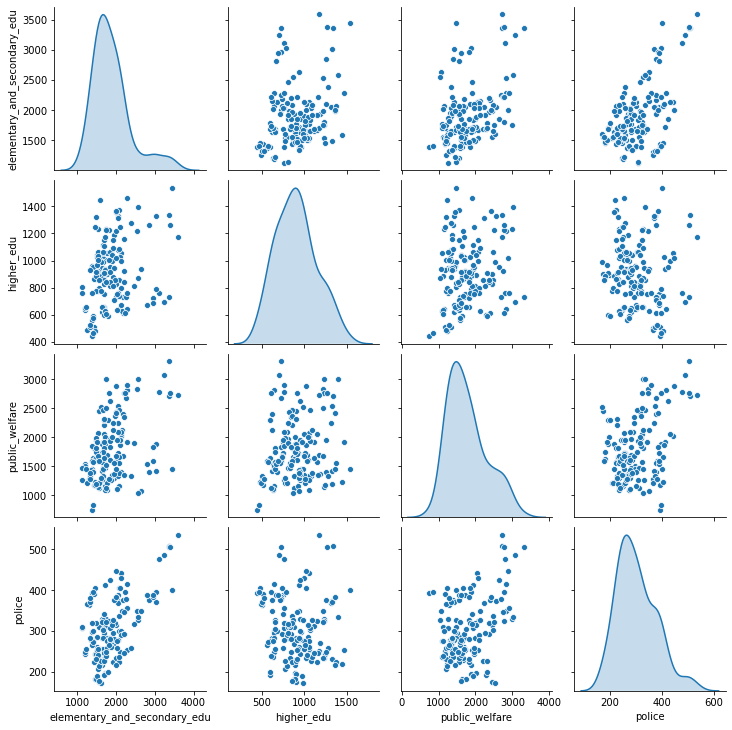

In [305]:
sns.pairplot(train_dataset[["elementary_and_secondary_edu", "higher_edu", "public_welfare", "police"]], diag_kind="kde")

In [306]:
train_stats = train_dataset.describe()
train_stats.pop("total_correctional_pop")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
total,157.0,8841.592310,2164.808886,6070.927734,7546.249023,8302.516602,9566.156250,20072.259766
elementary_and_secondary_edu,157.0,1887.148808,496.054536,1124.122437,1544.745850,1748.038086,2068.893311,3594.531494
higher_edu,157.0,908.695076,238.164204,440.716705,733.915222,901.583801,1057.266357,1537.209351
public_welfare,157.0,1783.079191,531.447206,747.000305,1376.157959,1665.749146,2061.638916,3314.129883
health_and_hospitals,157.0,765.461203,404.636550,117.189430,548.496582,673.432800,933.146545,2785.649170
...,...,...,...,...,...,...,...,...
VT,157.0,0.012739,0.112504,0.000000,0.000000,0.000000,0.000000,1.000000
WA,157.0,0.006369,0.079809,0.000000,0.000000,0.000000,0.000000,1.000000
WI,157.0,0.019108,0.137344,0.000000,0.000000,0.000000,0.000000,1.000000
WV,157.0,0.012739,0.112504,0.000000,0.000000,0.000000,0.000000,1.000000


In [307]:
# split features from labels
train_labels = train_dataset.pop('total_correctional_pop')
test_labels = test_dataset.pop('total_correctional_pop')

In [308]:
# normalising the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [309]:
# build the model 
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse', 'accuracy'])
    
    return model
checkpoint_path = "hack-for-people/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1)

In [310]:
model = build_model()

In [311]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                4224      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 8,449
Trainable params: 8,449
Non-trainable params: 0
_________________________________________________________________


In [312]:
# import tensorflow_docs as tfdocs
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [313]:
# early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [314]:
early_history = model.fit(normed_train_data, train_labels, 
                    epochs=epochs, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, cp_callback])


Epoch 00001: saving model to hack-for-people\cp.ckpt

Epoch 00002: saving model to hack-for-people\cp.ckpt

Epoch 00003: saving model to hack-for-people\cp.ckpt

Epoch 00004: saving model to hack-for-people\cp.ckpt

Epoch 00005: saving model to hack-for-people\cp.ckpt

Epoch 00006: saving model to hack-for-people\cp.ckpt

Epoch 00007: saving model to hack-for-people\cp.ckpt

Epoch 00008: saving model to hack-for-people\cp.ckpt

Epoch 00009: saving model to hack-for-people\cp.ckpt

Epoch 00010: saving model to hack-for-people\cp.ckpt

Epoch 00011: saving model to hack-for-people\cp.ckpt

Epoch 00012: saving model to hack-for-people\cp.ckpt

Epoch 00013: saving model to hack-for-people\cp.ckpt

Epoch 00014: saving model to hack-for-people\cp.ckpt

Epoch 00015: saving model to hack-for-people\cp.ckpt

Epoch 00016: saving model to hack-for-people\cp.ckpt

Epoch 00017: saving model to hack-for-people\cp.ckpt

Epoch 00018: saving model to hack-for-people\cp.ckpt

Epoch 00019: saving model t

Epoch 00154: saving model to hack-for-people\cp.ckpt

Epoch 00155: saving model to hack-for-people\cp.ckpt

Epoch 00156: saving model to hack-for-people\cp.ckpt

Epoch 00157: saving model to hack-for-people\cp.ckpt

Epoch 00158: saving model to hack-for-people\cp.ckpt

Epoch 00159: saving model to hack-for-people\cp.ckpt

Epoch 00160: saving model to hack-for-people\cp.ckpt

Epoch 00161: saving model to hack-for-people\cp.ckpt

Epoch 00162: saving model to hack-for-people\cp.ckpt

Epoch 00163: saving model to hack-for-people\cp.ckpt

Epoch 00164: saving model to hack-for-people\cp.ckpt

Epoch 00165: saving model to hack-for-people\cp.ckpt

Epoch 00166: saving model to hack-for-people\cp.ckpt

Epoch 00167: saving model to hack-for-people\cp.ckpt

Epoch 00168: saving model to hack-for-people\cp.ckpt

Epoch 00169: saving model to hack-for-people\cp.ckpt

Epoch 00170: saving model to hack-for-people\cp.ckpt

Epoch 00171: saving model to hack-for-people\cp.ckpt

Epoch 00172: saving model to

Epoch 00306: saving model to hack-for-people\cp.ckpt

Epoch 00307: saving model to hack-for-people\cp.ckpt

Epoch 00308: saving model to hack-for-people\cp.ckpt

Epoch 00309: saving model to hack-for-people\cp.ckpt

Epoch 00310: saving model to hack-for-people\cp.ckpt

Epoch 00311: saving model to hack-for-people\cp.ckpt

Epoch 00312: saving model to hack-for-people\cp.ckpt

Epoch 00313: saving model to hack-for-people\cp.ckpt

Epoch 00314: saving model to hack-for-people\cp.ckpt

Epoch 00315: saving model to hack-for-people\cp.ckpt

Epoch 00316: saving model to hack-for-people\cp.ckpt

Epoch 00317: saving model to hack-for-people\cp.ckpt

Epoch 00318: saving model to hack-for-people\cp.ckpt

Epoch 00319: saving model to hack-for-people\cp.ckpt

Epoch 00320: saving model to hack-for-people\cp.ckpt

Epoch 00321: saving model to hack-for-people\cp.ckpt

Epoch 00322: saving model to hack-for-people\cp.ckpt

Epoch 00323: saving model to hack-for-people\cp.ckpt

Epoch 00324: saving model to


Epoch 00460: saving model to hack-for-people\cp.ckpt

Epoch 00461: saving model to hack-for-people\cp.ckpt

Epoch 00462: saving model to hack-for-people\cp.ckpt

Epoch 00463: saving model to hack-for-people\cp.ckpt

Epoch 00464: saving model to hack-for-people\cp.ckpt

Epoch 00465: saving model to hack-for-people\cp.ckpt

Epoch 00466: saving model to hack-for-people\cp.ckpt

Epoch 00467: saving model to hack-for-people\cp.ckpt

Epoch 00468: saving model to hack-for-people\cp.ckpt

Epoch 00469: saving model to hack-for-people\cp.ckpt

Epoch 00470: saving model to hack-for-people\cp.ckpt

Epoch 00471: saving model to hack-for-people\cp.ckpt

Epoch 00472: saving model to hack-for-people\cp.ckpt

Epoch 00473: saving model to hack-for-people\cp.ckpt

Epoch 00474: saving model to hack-for-people\cp.ckpt

Epoch 00475: saving model to hack-for-people\cp.ckpt

Epoch 00476: saving model to hack-for-people\cp.ckpt

Epoch 00477: saving model to hack-for-people\cp.ckpt

Epoch 00478: saving model t


Epoch 00612: saving model to hack-for-people\cp.ckpt

Epoch 00613: saving model to hack-for-people\cp.ckpt

Epoch 00614: saving model to hack-for-people\cp.ckpt

Epoch 00615: saving model to hack-for-people\cp.ckpt

Epoch 00616: saving model to hack-for-people\cp.ckpt

Epoch 00617: saving model to hack-for-people\cp.ckpt

Epoch 00618: saving model to hack-for-people\cp.ckpt

Epoch 00619: saving model to hack-for-people\cp.ckpt

Epoch 00620: saving model to hack-for-people\cp.ckpt

Epoch 00621: saving model to hack-for-people\cp.ckpt

Epoch 00622: saving model to hack-for-people\cp.ckpt

Epoch 00623: saving model to hack-for-people\cp.ckpt

Epoch 00624: saving model to hack-for-people\cp.ckpt

Epoch 00625: saving model to hack-for-people\cp.ckpt

Epoch 00626: saving model to hack-for-people\cp.ckpt

Epoch 00627: saving model to hack-for-people\cp.ckpt

Epoch 00628: saving model to hack-for-people\cp.ckpt

Epoch 00629: saving model to hack-for-people\cp.ckpt

Epoch 00630: saving model t


Epoch 00766: saving model to hack-for-people\cp.ckpt

Epoch 00767: saving model to hack-for-people\cp.ckpt

Epoch 00768: saving model to hack-for-people\cp.ckpt

Epoch 00769: saving model to hack-for-people\cp.ckpt

Epoch 00770: saving model to hack-for-people\cp.ckpt

Epoch 00771: saving model to hack-for-people\cp.ckpt

Epoch 00772: saving model to hack-for-people\cp.ckpt

Epoch 00773: saving model to hack-for-people\cp.ckpt

Epoch 00774: saving model to hack-for-people\cp.ckpt

Epoch 00775: saving model to hack-for-people\cp.ckpt

Epoch 00776: saving model to hack-for-people\cp.ckpt

Epoch 00777: saving model to hack-for-people\cp.ckpt

Epoch 00778: saving model to hack-for-people\cp.ckpt

Epoch 00779: saving model to hack-for-people\cp.ckpt

Epoch 00780: saving model to hack-for-people\cp.ckpt

Epoch 00781: saving model to hack-for-people\cp.ckpt

Epoch 00782: saving model to hack-for-people\cp.ckpt

Epoch 00783: saving model to hack-for-people\cp.ckpt

Epoch 00784: saving model t


Epoch 00918: saving model to hack-for-people\cp.ckpt

Epoch 00919: saving model to hack-for-people\cp.ckpt

Epoch 00920: saving model to hack-for-people\cp.ckpt

Epoch 00921: saving model to hack-for-people\cp.ckpt

Epoch 00922: saving model to hack-for-people\cp.ckpt

Epoch 00923: saving model to hack-for-people\cp.ckpt

Epoch 00924: saving model to hack-for-people\cp.ckpt

Epoch 00925: saving model to hack-for-people\cp.ckpt

Epoch 00926: saving model to hack-for-people\cp.ckpt

Epoch 00927: saving model to hack-for-people\cp.ckpt

Epoch 00928: saving model to hack-for-people\cp.ckpt

Epoch 00929: saving model to hack-for-people\cp.ckpt

Epoch 00930: saving model to hack-for-people\cp.ckpt

Epoch 00931: saving model to hack-for-people\cp.ckpt

Epoch 00932: saving model to hack-for-people\cp.ckpt

Epoch 00933: saving model to hack-for-people\cp.ckpt

Epoch 00934: saving model to hack-for-people\cp.ckpt

Epoch 00935: saving model to hack-for-people\cp.ckpt

Epoch 00936: saving model t

In [321]:
!dir {checkpoint_dir}

 Volume in drive C has no label.
 Volume Serial Number is 001E-4AA5

 Directory of C:\Users\moshi\Codes\hack-for-people\hack-for-people

2020-08-22  10:31 PM    <DIR>          .
2020-08-22  10:31 PM    <DIR>          ..
2020-08-22  10:31 PM                71 checkpoint
2020-08-22  10:31 PM           104,256 cp.ckpt.data-00000-of-00001
2020-08-22  10:31 PM             1,622 cp.ckpt.index
               3 File(s)        105,949 bytes
               2 Dir(s)  350,915,596,288 bytes free


In [316]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

2/2 - 0s - loss: 2024225408.0000 - mae: 23946.2031 - mse: 2024225408.0000
Testing set Mean Abs Error: 23946.20 MPG


dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


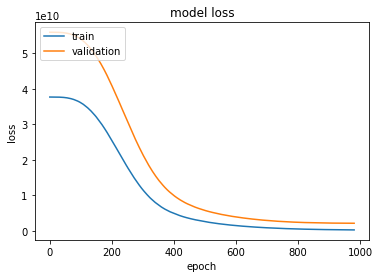

In [317]:
print(early_history.history.keys())
# "Loss"
plt.plot(early_history.history['loss'])
plt.plot(early_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# # MSE
# plt.plot(early_history.history['mse'])
# plt.plot(early_history.history['val_mse'])
# plt.title('model mse')
# plt.ylabel('mse')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
# # mae
# plt.plot(early_history.history['mae'])
# plt.plot(early_history.history['val_mae'])
# plt.title('model mae')
# plt.ylabel('mae')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [318]:
test_predictions = model.predict(normed_test_data).flatten()

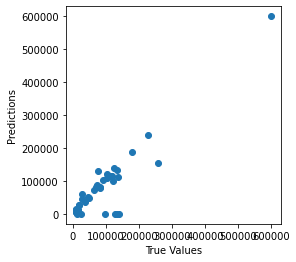

In [319]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [320]:
model_two = build_model()

In [322]:
model_two.load_weights(checkpoint_path)

loss, mae, mse = model_two.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

2/2 - 0s - loss: 2024225408.0000 - mae: 23946.2031 - mse: 2024225408.0000
Testing set Mean Abs Error: 23946.20 MPG
